In [1]:
import pandas as pd
import imblearn
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime, timedelta

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_roc_curve, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import fbeta_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Embedded_features_2018_2022_prior.csv")
df.drop("Unnamed: 0",axis=1, inplace=True)
X_df=df.drop(['DepDelay','Label'],axis=1)

y_df=df['Label']
#df.tail(5)


# 24 hour prediction horizon

## Logistic Regression

In [3]:
selected_features=['Temperature_F', 'Dew_Point_F', 'Humidity_%', 'Wind_Speed_mph',
       'Wind_Gust_mph', 'Pressure_in', 'Precip_in', 'Carrier_delay_probabilty',
        "Destination_delay_probabilty",
       'Yesterday_delay_probabilty', 'Wind_x', 'Wind_y', 'DayOfWeek_x',
       'DayOfWeek_y', 'Month_x', 'Month_y', 'Hour_x', 'Hour_y']#
X_df=X_df[selected_features]

### Under sampling

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test=train_test_split(X_df, y_df.values.flatten(), test_size=.3,
                                                              shuffle=True)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)

#################



In [5]:
clf_log_under= LogisticRegression(max_iter=200)
clf_log_under = clf_log_under.fit(X_train_under, y_train_under)

y_pred_train_lunder = clf_log_under.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_train_lunder))
print(metrics.confusion_matrix(y_train_under, y_pred_train_lunder))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_train_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_train_lunder, beta = 2, average = None))
print()
print()
y_pred_test_lunder = clf_log_under.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_lunder))
print(metrics.confusion_matrix(y_test, y_pred_test_lunder))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_lunder, beta = 2, average = None))

Training set 0.6623724628242701
[[50558 23146]
 [26623 47081]]
              precision    recall  f1-score   support

     On Time      0.655     0.686     0.670     73704
        Late      0.670     0.639     0.654     73704

    accuracy                          0.662    147408
   macro avg      0.663     0.662     0.662    147408
weighted avg      0.663     0.662     0.662    147408

F2 score:  [0.67954849 0.64486923]


Test set 0.67660607941187
[[93102 42860]
 [11335 20285]]
              precision    recall  f1-score   support

     On Time      0.891     0.685     0.775    135962
        Late      0.321     0.642     0.428     31620

    accuracy                          0.677    167582
   macro avg      0.606     0.663     0.601    167582
weighted avg      0.784     0.677     0.709    167582

F2 score:  [0.71806381 0.53487146]


### maxiter - 1000 log under

Training set 0.6656170686355678
[[51372 22307]
 [26967 46712]]
              precision    recall  f1-score   support

     On Time      0.656     0.697     0.676     73679
        Late      0.677     0.634     0.655     73679

    accuracy                          0.666    147358
   macro avg      0.666     0.666     0.665    147358
weighted avg      0.666     0.666     0.665    147358

Test set 0.6837190151686935
[[94388 41549]
 [11454 20191]]
              precision    recall  f1-score   support

     On Time      0.892     0.694     0.781    135937
        Late      0.327     0.638     0.432     31645

    accuracy                          0.684    167582
   macro avg      0.609     0.666     0.607    167582
weighted avg      0.785     0.684     0.715    167582

In [6]:
#Aug 2022 data

df_aug=pd.read_csv("Embedded_features_Aug2022_posterior.csv")
df_aug.drop("Unnamed: 0",axis=1, inplace=True)
X_post_df=df_aug.drop(['DepDelay',"Delaym4h_s",'Label'],axis=1)


X_post_df=X_post_df[selected_features]
y_post_df=df_aug['Label']

In [7]:
# Testing log reg on August data (under model)
y_pred_aug_lunder = clf_log_under.predict(X_post_df)
print("Test set",metrics.accuracy_score(y_post_df, y_pred_aug_lunder))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_lunder))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_lunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_lunder, beta = 2, average = None))

Test set 0.5666822211852544
[[3638 4108]
 [ 535 2434]]
              precision    recall  f1-score   support

     On Time      0.872     0.470     0.610      7746
        Late      0.372     0.820     0.512      2969

    accuracy                          0.567     10715
   macro avg      0.622     0.645     0.561     10715
weighted avg      0.733     0.567     0.583     10715

F2 score:  [0.51739341 0.66076664]


In [8]:
(5*.87*.506)/((4*.87)+.506)

0.5522077270446563

### Over Sampling

In [9]:



oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
X_test_over, y_test_over = oversample.fit_resample(X_test, y_test)

clf_log_over= LogisticRegression(max_iter=1000)
clf_log_over = clf_log_over.fit(X_train_over, y_train_over)

y_pred_train_lover = clf_log_over.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_train_lover))
print(metrics.confusion_matrix(y_train_over, y_pred_train_lover))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_train_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_train_lover, beta = 2, average = None))
print()
print()
y_pred_test_lover = clf_log_over.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_lover))
print(metrics.confusion_matrix(y_test, y_pred_test_lover))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_lover, beta = 2, average = None))

Training set 0.6611606580108408
[[217314 100006]
 [115035 202285]]
              precision    recall  f1-score   support

     On Time      0.654     0.685     0.669    317320
        Late      0.669     0.637     0.653    317320

    accuracy                          0.661    634640
   macro avg      0.662     0.661     0.661    634640
weighted avg      0.662     0.661     0.661    634640

F2 score:  [0.67841554 0.64357576]


Test set 0.6775787375732477
[[93317 42645]
 [11387 20233]]
              precision    recall  f1-score   support

     On Time      0.891     0.686     0.775    135962
        Late      0.322     0.640     0.428     31620

    accuracy                          0.678    167582
   macro avg      0.607     0.663     0.602    167582
weighted avg      0.784     0.678     0.710    167582

F2 score:  [0.71942574 0.53425258]


In [10]:
# Testing log reg on August data (over model)
y_pred_aug_lover = clf_log_over.predict(X_post_df)
print("Test set",metrics.accuracy_score(y_post_df, y_pred_aug_lover))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_lover))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_lover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_lover, beta = 2, average = None))

Test set 0.5644423705086328
[[3610 4136]
 [ 531 2438]]
              precision    recall  f1-score   support

     On Time      0.872     0.466     0.607      7746
        Late      0.371     0.821     0.511      2969

    accuracy                          0.564     10715
   macro avg      0.621     0.644     0.559     10715
weighted avg      0.733     0.564     0.581     10715

F2 score:  [0.513879   0.66070461]


# XGBoost

### Under sampling

In [11]:
import xgboost
from xgboost import XGBClassifier

### tuned parameters for under sampling
params={'max_depth': 8, 'eta': .3, "eval_metric":"aucpr", 'sub_sample': 0.5, 'gamma': 0.05,
        
       'objective': 'binary:logistic',"n_estimators":200, 'reg_alpha': 1, 'reg_lambda': 1,
        
       'scale_pos_weight': 2, 'min_child_weight': 1.5}

clf_xgb_under3 = XGBClassifier(**params)
#eval set helps to keep an eye at over fitting
clf_xgb_under3 = clf_xgb_under3.fit(X_train_under, y_train_under)

y_pred_train_gunder = clf_xgb_under3.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_train_gunder))
print(metrics.confusion_matrix(y_train_under, y_pred_train_gunder))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_train_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_train_gunder, beta = 2, average = None))
y_pred_test_gunder = clf_xgb_under3.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_gunder))
print(metrics.confusion_matrix(y_test, y_pred_test_gunder))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_gunder, beta = 2, average = None))
y_pred_test_gunder2 = clf_xgb_under3.predict(X_test_under)
print("Test set2",metrics.accuracy_score(y_test_under, y_pred_test_gunder2))
print(metrics.confusion_matrix(y_test_under, y_pred_test_gunder2))
target_names= ['On Time','Late']
print(classification_report(y_test_under, y_pred_test_gunder2, target_names=target_names, digits=3))



[13:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Training set 0.8470571475089548
[[53926 19778]
 [ 2767 70937]]
              precision    recall  f1-score   support

     On Time      0.951     0.732     0.827     73704
        Late      0.782     0.962     0.863     73704

    accuracy                          0.847    147408
   macro avg      0.867     0.847     0.845    147408
weighted avg      0.867     0.847     0.845    147408

F2 score:  [0.76706429 0.91999087]
Test set 0.6455108543877027
[[80976 54986]
 [ 4420 27200]]
              precision    recall  f1-score   support

     On Time      0.948     0.596     0.732    135962
        Late      0.331     0.860     0.478     31620

    accuracy                          0.646    167582
   macro avg      0.640     0.728     0.605    167582
weighted avg      0.832     0.646     0.684 

In [12]:
# Testing xgb on August data (under model)
y_pred_aug_gunder = clf_xgb_under3.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_gunder))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_gunder))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_gunder, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_gunder, beta = 2, average = None))

Aug set 0.5252449836677555
[[3241 4505]
 [ 582 2387]]
              precision    recall  f1-score   support

     On Time      0.848     0.418     0.560      7746
        Late      0.346     0.804     0.484      2969

    accuracy                          0.525     10715
   macro avg      0.597     0.611     0.522     10715
weighted avg      0.709     0.525     0.539     10715

F2 score:  [0.46556727 0.63592285]


### Over sampling

In [13]:

### tuned parameters for over sampling


params={'max_depth': 5, 'eta': .1, "eval_metric":"aucpr", 'sub_sample': 0.5, 'gamma': 0.8,
        
       'objective': 'binary:logistic',"n_estimators":100, 'reg_alpha': 1, 'reg_lambda': 0,
        
       'scale_pos_weight': 1.15, 'min_child_weight': 1}

clf_xgb_over3 = XGBClassifier(**params)
#eval set helps to keep an eye at over fitting
clf_xgb_over3 = clf_xgb_over3.fit(X_train_over, y_train_over)

y_pred_train_gover = clf_xgb_over3.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_train_gover))
print(metrics.confusion_matrix(y_train_over, y_pred_train_gover))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_train_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_train_gover, beta = 2, average = None))
y_pred_test_gover = clf_xgb_over3.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_test_gover))
print(metrics.confusion_matrix(y_test, y_pred_test_gover))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_test_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_test_gover, beta = 2, average = None))
y_pred_test_gover2 = clf_xgb_over3.predict(X_test_over)
print("Test set2",metrics.accuracy_score(y_test_over, y_pred_test_gover2))
print(metrics.confusion_matrix(y_test_over, y_pred_test_gover2))
target_names= ['On Time','Late']
print(classification_report(y_test_over, y_pred_test_gover2, target_names=target_names, digits=3))






[13:38:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.

Training set 0.6890252741711836
[[210987 106333]
 [ 91024 226296]]
              precision    recall  f1-score   support

     On Time      0.699     0.665     0.681    317320
        Late      0.680     0.713     0.696    317320

    accuracy                          0.689    634640
   macro avg      0.689     0.689     0.689    634640
weighted avg      0.689     0.689     0.689    634640

F2 score:  [0.67138105 0.70633226]
Test set 0.6715578045374802
[[90192 45770]
 [ 9271 22349]]
              precision    recall  f1-score   support

     On Time      0.907     0.663     0.766    135962
        Late      0.328     0.707     0.448     31620

    accuracy                          0.672    167582
   macro avg      0.617     0.685     0.607    167582
weighted avg      0.798     0.672     0.

In [14]:
# Testing xgb on August data (over model)
y_pred_aug_gover = clf_xgb_over3.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_gover))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_gover))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_gover, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_gover, beta = 2, average = None))


Aug set 0.5464302379841344
[[3308 4438]
 [ 422 2547]]
              precision    recall  f1-score   support

     On Time      0.887     0.427     0.577      7746
        Late      0.365     0.858     0.512      2969

    accuracy                          0.546     10715
   macro avg      0.626     0.642     0.544     10715
weighted avg      0.742     0.546     0.559     10715

F2 score:  [0.47646483 0.6752028 ]


# AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf_ada= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=5), n_estimators=50)
clf_ada = clf_ada.fit(X_train_over, y_train_over)

y_pred = clf_ada.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred))
print(metrics.confusion_matrix(y_train_over, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred, beta = 2, average = None))

y_pred = clf_ada.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred,beta = 2, average = None))


Training set 0.8810837640236985
[[275135  42185]
 [ 33284 284036]]
              precision    recall  f1-score   support

     On Time      0.892     0.867     0.879    317320
        Late      0.871     0.895     0.883    317320

    accuracy                          0.881    634640
   macro avg      0.881     0.881     0.881    634640
weighted avg      0.881     0.881     0.881    634640

F2 score:  [0.87195023 0.89011539]
Test set 0.7896432791111218
[[111726  24236]
 [ 11016  20604]]
              precision    recall  f1-score   support

     On Time      0.910     0.822     0.864    135962
        Late      0.460     0.652     0.539     31620

    accuracy                          0.790    167582
   macro avg      0.685     0.737     0.701    167582
weighted avg      0.825     0.790     0.802    167582

F2 score:  [0.83804137 0.60133084]


In [16]:
y_pred_aug_ada = clf_ada.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_ada))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_ada))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_ada, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_ada,beta = 2, average = None))

Aug set 0.635744283714419
[[5367 2379]
 [1524 1445]]
              precision    recall  f1-score   support

     On Time      0.779     0.693     0.733      7746
        Late      0.378     0.487     0.425      2969

    accuracy                          0.636     10715
   macro avg      0.578     0.590     0.579     10715
weighted avg      0.668     0.636     0.648     10715

F2 score:  [0.70851485 0.46019108]


In [17]:
#Under sampling
clf_ada_und= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=5), n_estimators=50)
clf_ada_und = clf_ada.fit(X_train_under, y_train_under)

y_pred = clf_ada_und.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred))
print(metrics.confusion_matrix(y_train_under, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred, beta = 2, average = None))

y_pred = clf_ada_und.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred,beta = 2, average = None))

y_pred_aug_ada = clf_ada_und.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_ada))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_ada))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_ada, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_ada,beta = 2, average = None))

Training set 0.918376207532834
[[67529  6175]
 [ 5857 67847]]
              precision    recall  f1-score   support

     On Time      0.920     0.916     0.918     73704
        Late      0.917     0.921     0.919     73704

    accuracy                          0.918    147408
   macro avg      0.918     0.918     0.918    147408
weighted avg      0.918     0.918     0.918    147408

F2 score:  [0.91701023 0.91973983]
Test set 0.7190987098853099
[[97266 38696]
 [ 8378 23242]]
              precision    recall  f1-score   support

     On Time      0.921     0.715     0.805    135962
        Late      0.375     0.735     0.497     31620

    accuracy                          0.719    167582
   macro avg      0.648     0.725     0.651    167582
weighted avg      0.818     0.719     0.747    167582

F2 score:  [0.7487852  0.61676698]
Aug set 0.571535230984601
[[4314 3432]
 [1159 1810]]
              precision    recall  f1-score   support

     On Time      0.788     0.557     0.653    

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(max_depth= 10, n_estimators= 500)
clf_RF.fit(X_train_over, y_train_over)

y_pred_rfc_train = clf_RF.predict(X_train_over)
print("Training set",metrics.accuracy_score(y_train_over, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_over, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_over, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_over, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_over, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = clf_RF.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))


Training set 0.7054913021555528
[[234706  82614]
 [104293 213027]]
F2 score:  [0.72968061 0.6806318 ]
              precision    recall  f1-score   support

     On Time      0.692     0.740     0.715    317320
        Late      0.721     0.671     0.695    317320

    accuracy                          0.705    634640
   macro avg      0.706     0.705     0.705    634640
weighted avg      0.706     0.705     0.705    634640

F2 score:  [0.72968061 0.6806318 ]
Test set 0.7181200844959482
[[99930 36032]
 [11206 20414]]
              precision    recall  f1-score   support

     On Time      0.899     0.735     0.809    135962
        Late      0.362     0.646     0.464     31620

    accuracy                          0.718    167582
   macro avg      0.630     0.690     0.636    167582
weighted avg      0.798     0.718     0.744    167582

F2 score:  [0.76284306 0.5579852 ]


In [19]:
y_pred_aug_rfc = clf_RF.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))

Aug set 0.5994400373308446
[[4018 3728]
 [ 564 2405]]
              precision    recall  f1-score   support

     On Time       0.88      0.52      0.65      7746
        Late       0.39      0.81      0.53      2969

    accuracy                           0.60     10715
   macro avg       0.63      0.66      0.59     10715
weighted avg       0.74      0.60      0.62     10715

F2 score:  [0.56486532 0.66772169]


In [20]:
#Under sampling
clf_RF_und=RandomForestClassifier(max_depth= 10, n_estimators= 500)
clf_RF_und.fit(X_train_under, y_train_under)

y_pred_rfc_train = clf_RF_und.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_under, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = clf_RF_und.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))

y_pred_aug_rfc = clf_RF_und.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))


Training set 0.7110672419407359
[[55162 18542]
 [24049 49655]]
F2 score:  [0.73740666 0.68392867]
              precision    recall  f1-score   support

     On Time      0.696     0.748     0.721     73704
        Late      0.728     0.674     0.700     73704

    accuracy                          0.711    147408
   macro avg      0.712     0.711     0.711    147408
weighted avg      0.712     0.711     0.711    147408

F2 score:  [0.73740666 0.68392867]
Test set 0.7108878041794465
[[98410 37552]
 [10898 20722]]
              precision    recall  f1-score   support

     On Time      0.900     0.724     0.802    135962
        Late      0.356     0.655     0.461     31620

    accuracy                          0.711    167582
   macro avg      0.628     0.690     0.632    167582
weighted avg      0.798     0.711     0.738    167582

F2 score:  [0.75334223 0.56079977]
Aug set 0.5902006532897807
[[3881 3865]
 [ 526 2443]]
              precision    recall  f1-score   support

     On Ti

# Dummy Classifier

In [21]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_under, y_train_under)

y_pred_rfc_train = dummy_clf.predict(X_train_under)
print("Training set",metrics.accuracy_score(y_train_under, y_pred_rfc_train))
print(metrics.confusion_matrix(y_train_under, y_pred_rfc_train))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
target_names= ['On Time','Late']
print(classification_report(y_train_under, y_pred_rfc_train, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_train_under, y_pred_rfc_train,beta = 2, average = None))
y_pred_rfc_test = dummy_clf.predict(X_test)
print("Test set",metrics.accuracy_score(y_test, y_pred_rfc_test))
print(metrics.confusion_matrix(y_test, y_pred_rfc_test))
target_names= ['On Time','Late']
print(classification_report(y_test, y_pred_rfc_test, target_names=target_names, digits=3))
print('F2 score: ', fbeta_score(y_test, y_pred_rfc_test,beta = 2, average = None))

y_pred_aug_rfc = dummy_clf.predict(X_post_df)
print("Aug set",metrics.accuracy_score(y_post_df, y_pred_aug_rfc))
print(metrics.confusion_matrix(y_post_df, y_pred_aug_rfc))
target_names= ['On Time','Late']
print(classification_report(y_post_df, y_pred_aug_rfc, target_names=target_names, digits=2))
print('F2 score: ', fbeta_score(y_post_df, y_pred_aug_rfc,beta = 2, average = None))


Training set 0.5002103006621079
[[37014 36690]
 [36983 36721]]
F2 score:  [0.50179901 0.49861906]
              precision    recall  f1-score   support

     On Time      0.500     0.502     0.501     73704
        Late      0.500     0.498     0.499     73704

    accuracy                          0.500    147408
   macro avg      0.500     0.500     0.500    147408
weighted avg      0.500     0.500     0.500    147408

F2 score:  [0.50179901 0.49861906]
Test set 0.4999880655440322
[[67931 68031]
 [15762 15858]]
              precision    recall  f1-score   support

     On Time      0.812     0.500     0.619    135962
        Late      0.189     0.502     0.275     31620

    accuracy                          0.500    167582
   macro avg      0.500     0.501     0.447    167582
weighted avg      0.694     0.500     0.554    167582

F2 score:  [0.5412475  0.37690915]
Aug set 0.49127391507232854
[[3773 3973]
 [1478 1491]]
              precision    recall  f1-score   support

     On T

# Plotting Recall vs accuracy for all the models 

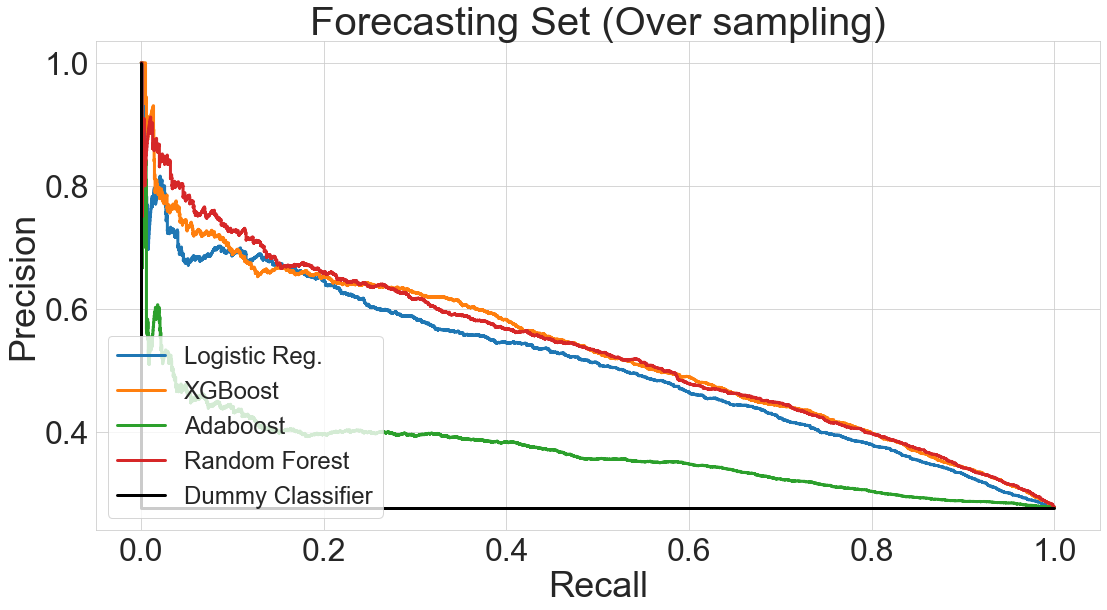

In [22]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
plot_precision_recall_curve(clf_log_over, X_post_df, y_post_df, ax=ax, label="Logistic Reg.",lw=3)
plot_precision_recall_curve(clf_xgb_over3, X_post_df, y_post_df, ax=ax, label="XGBoost",lw=3)
plot_precision_recall_curve(clf_ada, X_post_df, y_post_df, ax=ax, label="Adaboost",lw=3)
plot_precision_recall_curve(clf_RF, X_post_df, y_post_df, ax=ax, label="Random Forest",lw=3)
plot_precision_recall_curve(dummy_clf, X_post_df, y_post_df, ax=ax, label="Dummy Classifier",c='k',lw=3)

ax.legend(loc='lower left', fontsize=24)
ax.set_xlabel("Recall", fontsize=36)
ax.tick_params(axis='both', which='major', labelsize=32),
ax.set_ylabel("Precision", fontsize=36)
plt.title('Forecasting Set (Over sampling)', fontsize = 40)
plt.savefig('RP_over_all.png', dpi = 300, bbox_inches='tight')
plt.show()

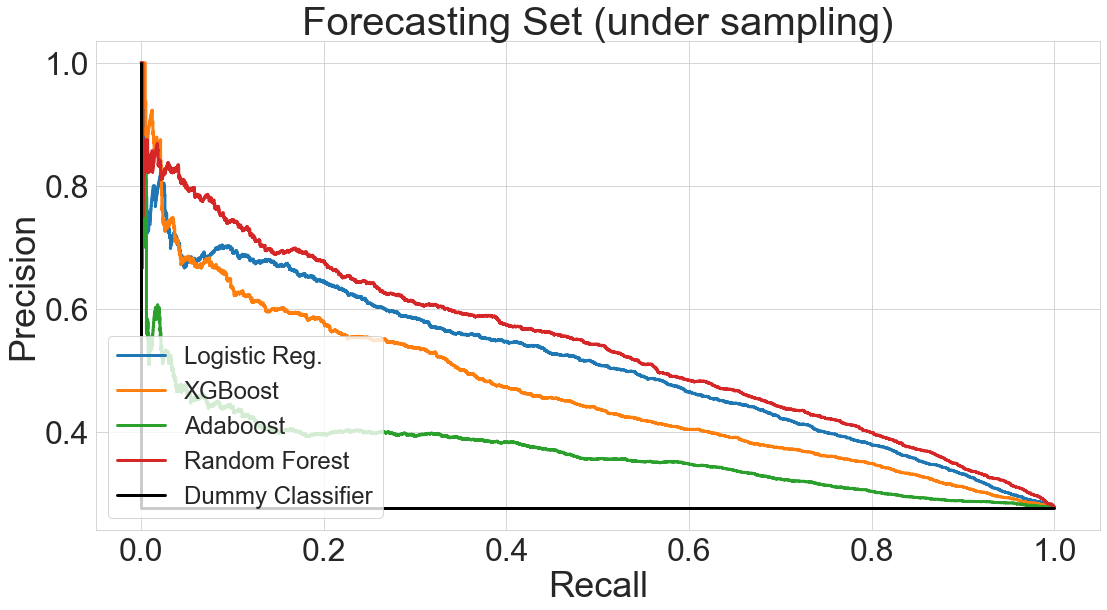

In [23]:
fig, ax = plt.subplots(1,1, figsize=(18,9))
plot_precision_recall_curve(clf_log_under, X_post_df, y_post_df, ax=ax, label="Logistic Reg.",lw=3)
plot_precision_recall_curve(clf_xgb_under3, X_post_df, y_post_df, ax=ax, label="XGBoost",lw=3)
plot_precision_recall_curve(clf_ada_und, X_post_df, y_post_df, ax=ax, label="Adaboost",lw=3)
plot_precision_recall_curve(clf_RF_und, X_post_df, y_post_df, ax=ax, label="Random Forest",lw=3)
plot_precision_recall_curve(dummy_clf, X_post_df, y_post_df, ax=ax, label="Dummy Classifier",c='k',lw=3)

ax.legend(loc='lower left', fontsize=24)
ax.set_xlabel("Recall", fontsize=36)
ax.tick_params(axis='both', which='major', labelsize=32),
ax.set_ylabel("Precision", fontsize=36)
plt.title('Forecasting Set (under sampling)', fontsize = 40)
plt.savefig('RP_under_all.png', dpi = 300, bbox_inches='tight')
plt.show()

# Feature importance

# Regression model

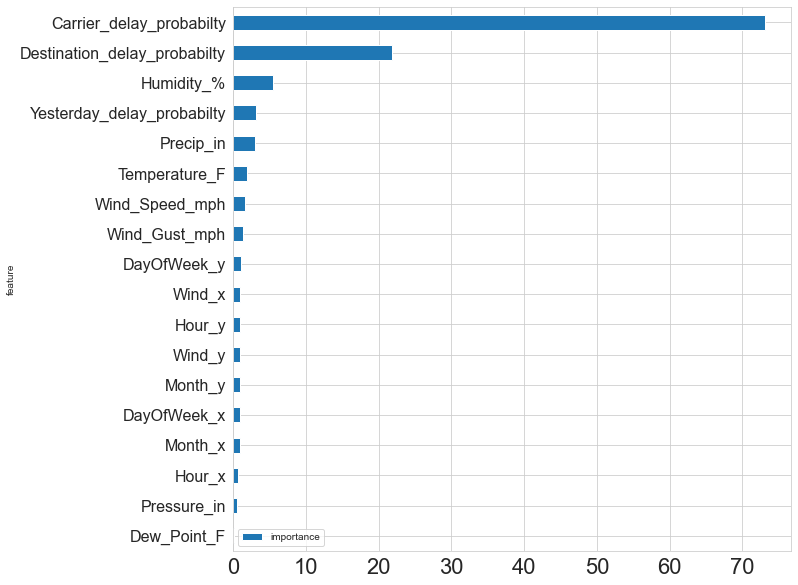

In [27]:

import math
w=clf_log_under.coef_[0]
feature_names=selected_features
feature_importance=pd.DataFrame(feature_names,columns=["feature"])
feature_importance["importance"]=pow(math.e,w)
feature_importance=feature_importance.sort_values(by=["importance"],ascending=True)

feature_importance.plot.barh(x='feature',y='importance',figsize=(10, 10))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=22)
# plt.title(

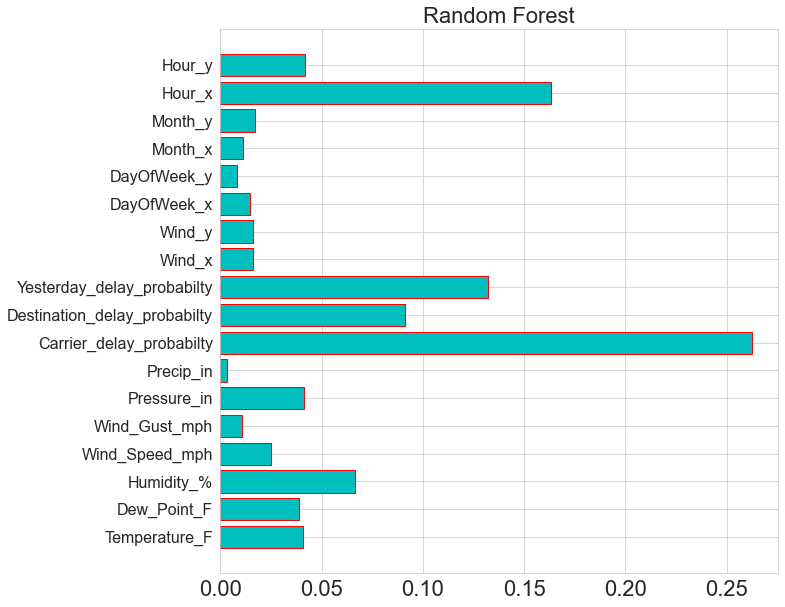

In [58]:
# Random Forest
plt.figure(figsize=(10, 10))
plt.barh(feature_names, clf_RF_und.feature_importances_,color="c", edgecolor='red')
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=22)
plt.title("Random Forest",fontsize=22)
plt.savefig('Random_Forest_feature_importance_24hrs.png', dpi = 300, bbox_inches='tight')


### tune the parameters